## Student Performance Prediction

## 1 Loading Libraries & Data¶

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# set style of visualization
sns.set_style("whitegrid")
sns.set_palette("RdBu")

In [ ]:
#read data set

data = pd.read_csv("/content/drive/MyDrive/meachin learning/baru/performa siswa/Student_Performance (6).csv")

In [ ]:
# see top 5 rows
data.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0


In [ ]:
# see column data type and some info

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Hours Studied                     10000 non-null  int64  
 1   Previous Scores                   10000 non-null  int64  
 2   Extracurricular Activities        10000 non-null  object 
 3   Sleep Hours                       10000 non-null  int64  
 4   Sample Question Papers Practiced  10000 non-null  int64  
 5   Performance Index                 10000 non-null  float64
dtypes: float64(1), int64(4), object(1)
memory usage: 468.9+ KB


In [ ]:
# see precentege of missing value in each column

data.isna().sum() / data.shape[0]

,0
Hours Studied,0.0
Previous Scores,0.0
Extracurricular Activities,0.0
Sleep Hours,0.0
Sample Question Papers Practiced,0.0
Performance Index,0.0


In [ ]:
# see dimensions

data.shape

(10000, 6)

In [ ]:
# check if duplicated in data

data.duplicated().any()

True

In [ ]:
# see quick info of numeric values

data.describe()

,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced,Performance Index
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,4.992900,69.445700,6.530600,4.583300,55.224800
std,2.589309,17.343152,1.695863,2.867348,19.212558
min,1.000000,40.000000,4.000000,0.000000,10.000000
25%,3.000000,54.000000,5.000000,2.000000,40.000000
50%,5.000000,69.000000,7.000000,5.000000,55.000000
75%,7.000000,85.000000,8.000000,7.000000,71.000000
max,9.000000,99.000000,9.000000,9.000000,100.000000


In [ ]:
# see quick info of category values

data.describe(include = object)

,Extracurricular Activities
count,10000
unique,2
top,No
freq,5052


## 2 Univariate Analysis & Visualizations

In [ ]:
# create function to visualized categorical column using count plot

def count_plot(column_name, hue = None, rotation = 0):
    """
    1) input : column name, column data type must be object or categorical
    3) output : cout plot using seaborn modules, unique values in x-axis and frequency in y-axis
    4) i use bar_label to show frequency of each unique values above each column in graph
    """
    graph = sns.countplot(x = column_name, data = data, hue = hue, order = data[column_name].value_counts().index)
    for container in graph.containers:
        graph.bar_label(container)


    plt.xticks(rotation = rotation)
    plt.show()

In [ ]:
# create function that visualized numeric columns using box plot

def box_plot(x_axis = None, y_axis = None, hue = None, col = None):
    """
    input : x_axis, y_axis and hue column, column data type must be numeric in y_axis
    output : box plot to see distribution of column values such as min,max,mean,medien,std
    """
    sns.catplot(x = x_axis, y = y_axis, data = data, hue = hue, kind = "box", col = col)
    plt.xlabel(x_axis)
    plt.ylabel("FRQ")
    plt.show()

In [ ]:
# see uniqie values

data["Hours Studied"].unique()

array([7, 4, 8, 5, 3, 6, 2, 1, 9])

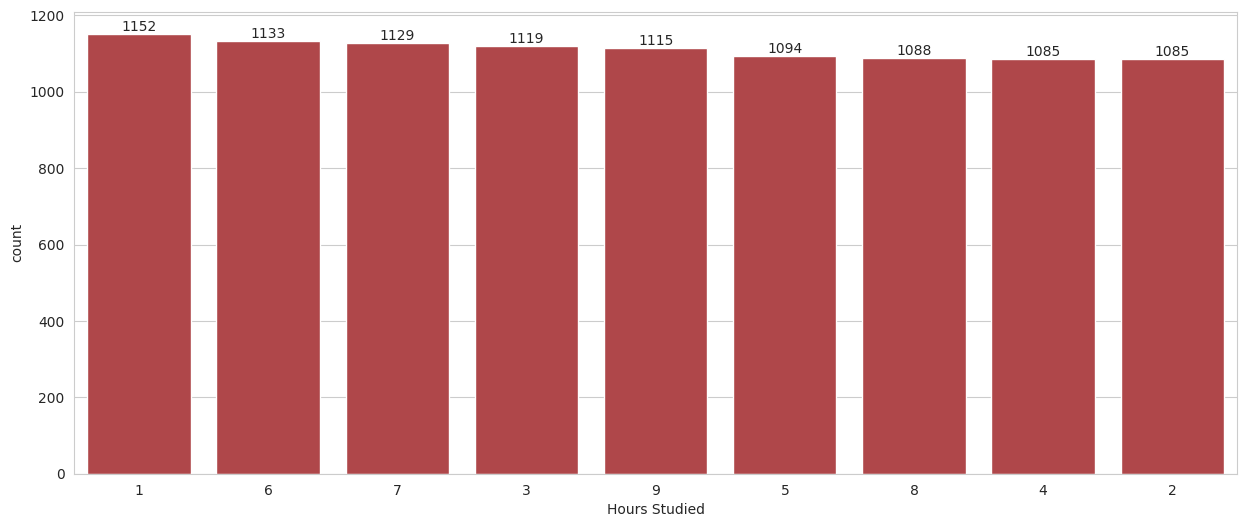

In [ ]:
# number of unique values is relatively large, count plot more suitable for it

# first set figure size
plt.figure(figsize = (15,6))

# call function i create it in cell 10
count_plot(column_name = "Hours Studied")

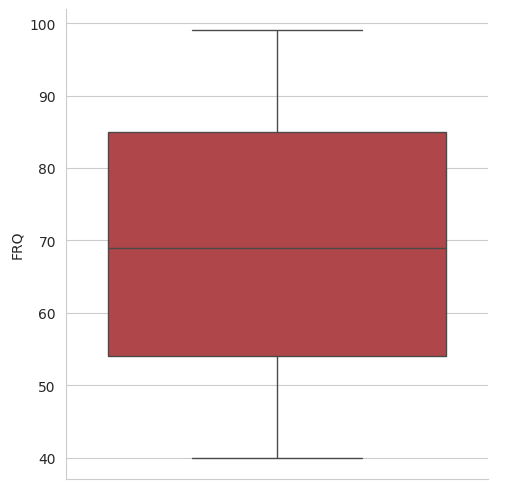

In [ ]:
# see distribution

box_plot(y_axis = "Previous Scores") # call function i create it in cell 11

In [ ]:
# see unique values

data["Extracurricular Activities"].unique()

array(['Yes', 'No'], dtype=object)

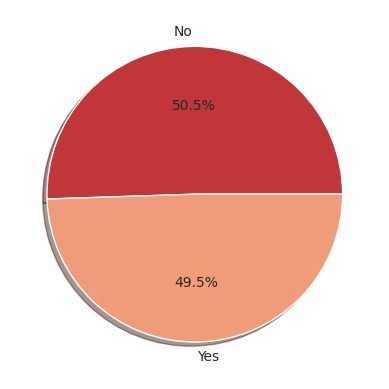

In [ ]:
# output number of values count

plt.pie(data["Extracurricular Activities"].value_counts(), labels = data["Extracurricular Activities"].value_counts().index,
        shadow = True, autopct = "%1.1f%%")
plt.show()

In [ ]:
# see unique values

data["Sleep Hours"].unique()

array([9, 4, 7, 5, 8, 6])

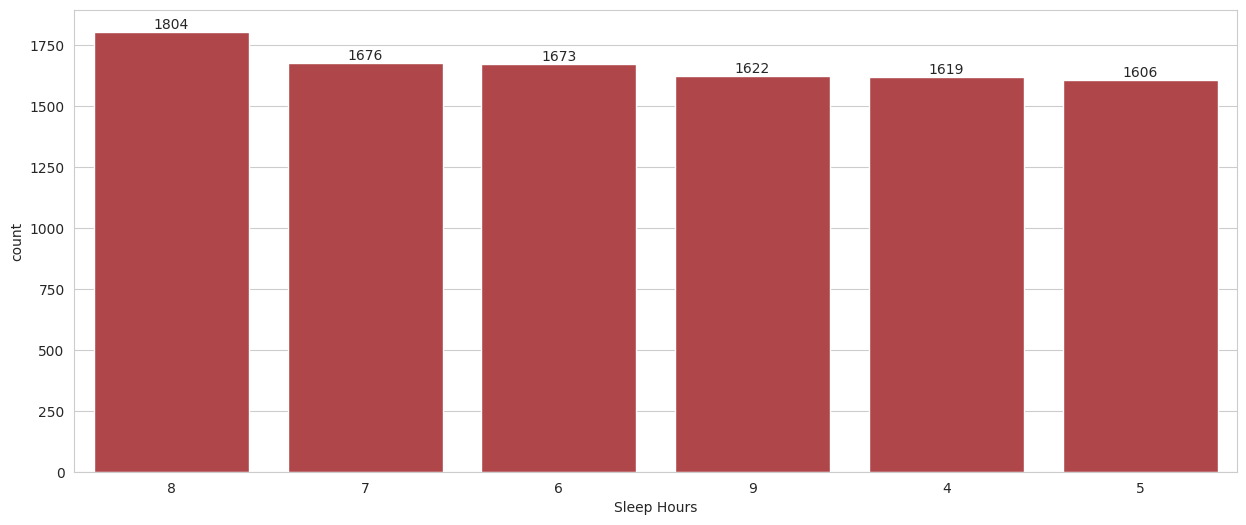

In [ ]:
# number of unique values is relatively large, count plot more suitable for it

# first set figure size
plt.figure(figsize = (15,6))

# call function i create it in cell 10
count_plot(column_name = "Sleep Hours")

In [ ]:
# see unique values

data["Sample Question Papers Practiced"].unique()

array([1, 2, 5, 6, 0, 8, 3, 4, 9, 7])

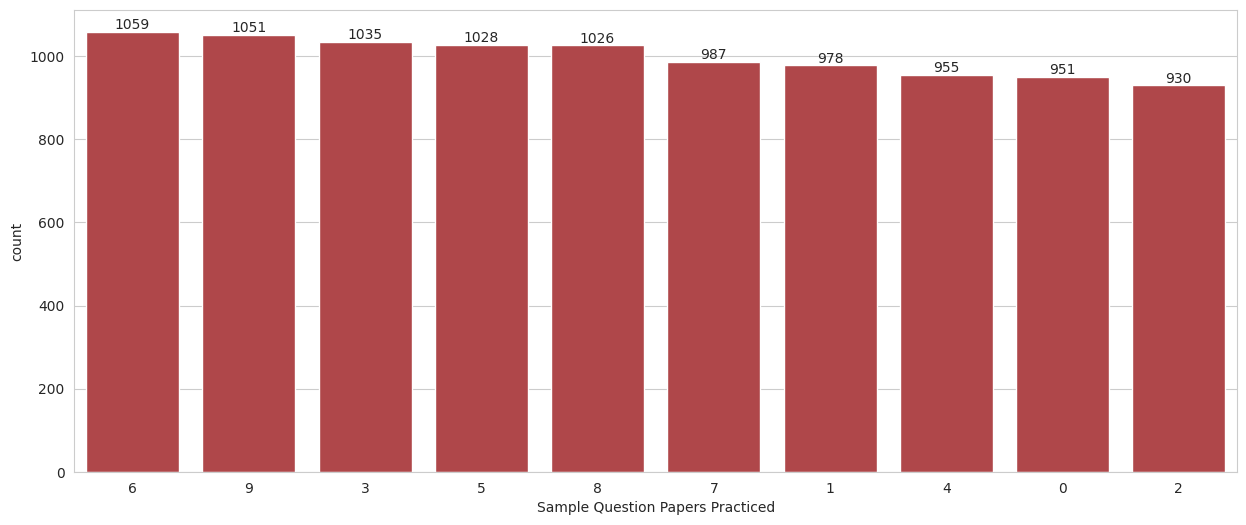

In [ ]:
# number of unique values is relatively large, count plot more suitable for it

# first set figure size
plt.figure(figsize = (15,6))

# call function i create it in cell 10
count_plot(column_name = "Sample Question Papers Practiced")


## Bivariate Analysis & Visualizations

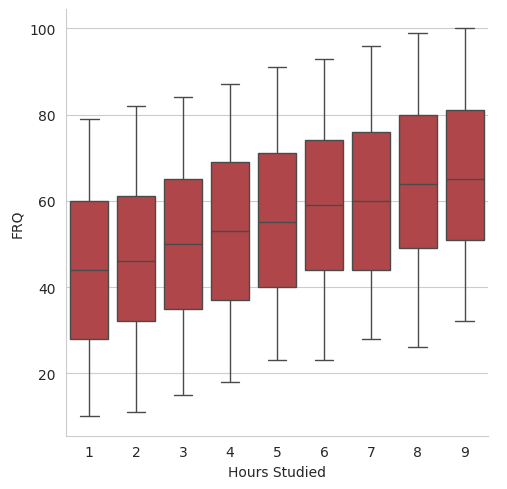

In [ ]:
# What is "Hours Studied" and "Performance Index" distribution

box_plot(x_axis = "Hours Studied", y_axis = "Performance Index") # call function i create it in cell 11

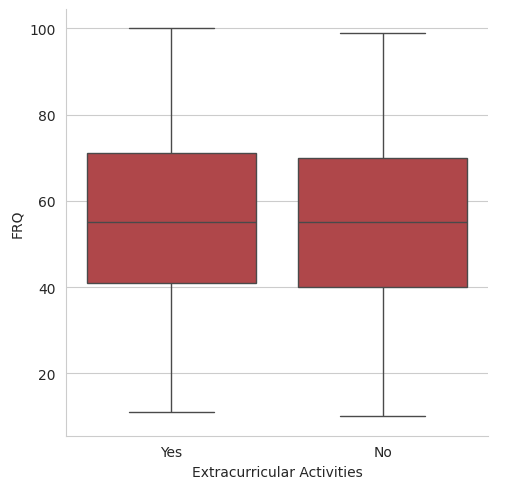

In [ ]:
# What is "	Extracurricular Activities" and "Performance Index" distribution

box_plot(x_axis = "Extracurricular Activities", y_axis = "Performance Index") # call function i create it in cell 11

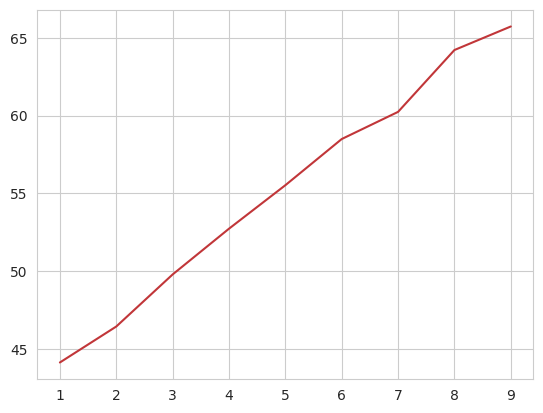

In [ ]:
# What is "Extracurricular Activities" and "Performance Index" distribution

avg_performance_by_hours = data.groupby('Hours Studied')['Performance Index'].mean()
plt.plot(avg_performance_by_hours.index, avg_performance_by_hours.values)
plt.show()

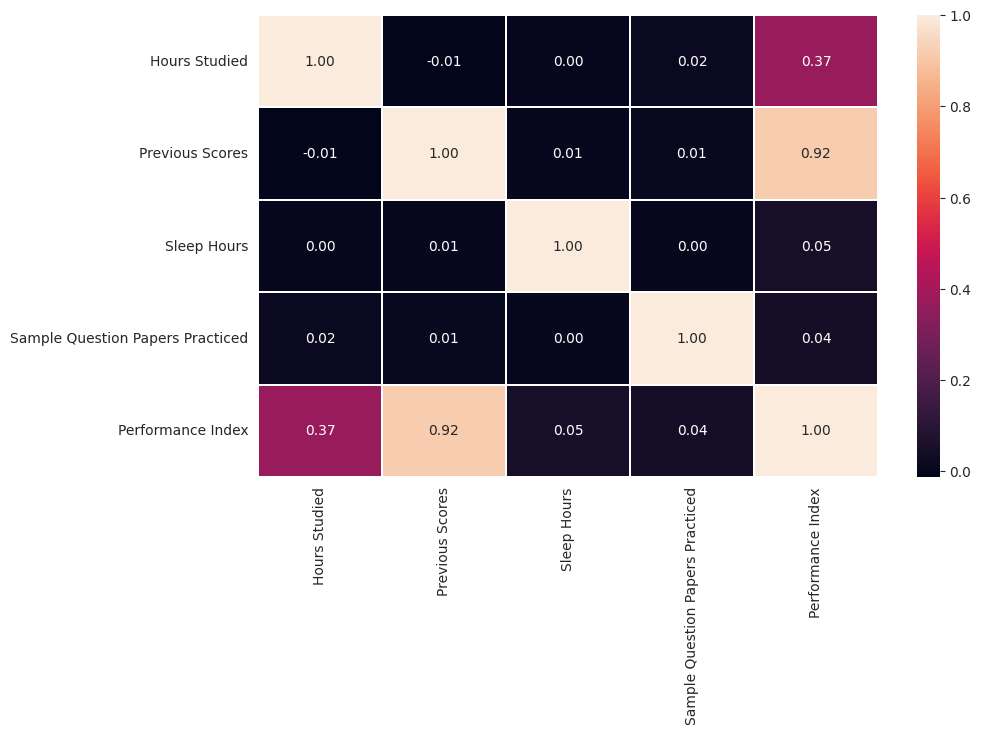

In [ ]:
# first visualize correlation matrix between numerical columns

plt.figure(figsize = (10,6))
sns.heatmap(data.select_dtypes(exclude = object).corr(), annot = True, fmt = ".2f", linewidths = 0.2)
plt.show()

## 3 Data Preprocessing

In [ ]:
# import libraries to model

from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,r2_score

In [ ]:
# create object from labelencoder

encoder = LabelEncoder()

data["Extracurricular Activities"] =  encoder.fit_transform(data["Extracurricular Activities"])

In [ ]:
# see sample of data

data.sample(2)

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
6024,4,63,Yes,5,1,47.0
4232,3,63,No,4,9,40.0


In [ ]:
# Splitting data into Indipendent and Dependent Variable

Train = data.drop(columns = "Performance Index")
Target = data["Performance Index"]

In [ ]:
# see sample of train data

Train.sample(3)

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced
6165,4,94,0,5,9
7322,5,54,1,6,8
1773,3,79,1,6,3


In [ ]:
# see sample of target label

Target

,Performance Index
0,91.0
1,65.0
2,45.0
3,36.0
4,66.0
...,...
9995,23.0
9996,58.0
9997,74.0
9998,95.0


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(Train, Target, test_size = 0.2, random_state = 42)

In [ ]:
# see shape of splited data

print("x_train shape: ", X_train.shape)
print("y_train shape: ", y_train.shape)
print("x_test shape: ", X_test.shape)
print("y_test shape: ", y_test.shape)

x_train shape:  (8000, 5)
y_train shape:  (8000,)
x_test shape:  (2000, 5)
y_test shape:  (2000,)


## 4 Modeling

In [ ]:
# create object from RandomForestRegressor

model = LinearRegression()

In [ ]:
# fit model

model.fit(X_train,y_train)

LinearRegression()

In [ ]:
# Import Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor


In [ ]:
# Create object for Random Forest Regressor
rf_model = RandomForestRegressor(random_state=42)


In [ ]:
# Fit model on training data
rf_model.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

## # Prediction Results Using Random Forest and Linear Regression Models

In [ ]:
#Prediction with Linear Regression:
lr_predict = model.predict(X_test)
#Prediction with Random forest:
rf_predict = rf_model.predict(X_test)




## # Model Power on Training and Testing Data

In [ ]:
#Model Linear Regression:
model.score(X_train, y_train)


0.9886898790682355

In [ ]:
#Model Random Forest:
rf_model.score(X_train, y_train)

0.9974562674825252

## # Performance Evaluation on Test Data

In [ ]:
# Evaluation Linear Regression:
mean_absolute_error(y_test, lr_predict)
r2_score(y_test, lr_predict)


0.9889832909573145

In [ ]:
# Evaluation  Random Forest:
mean_absolute_error(y_test, rf_predict)
r2_score(y_test, rf_predict)


0.9860792088401176

## 5 visualization of RESULTS

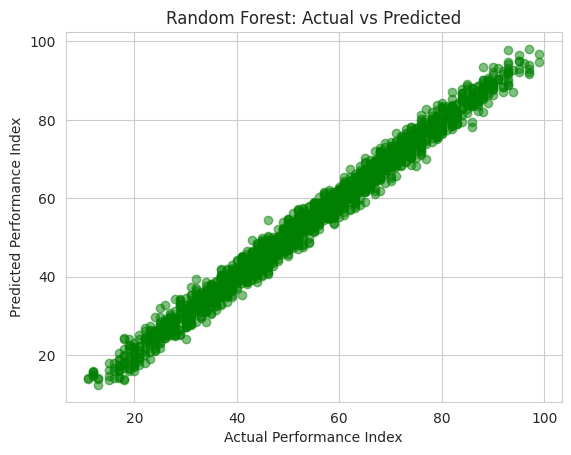

In [ ]:
import matplotlib.pyplot as plt

# Assuming rf_model is your trained Random Forest model and y_test is your actual target values
rf_predict = rf_model.predict(X_test)  # Predict values using the trained model

# Scatter plot of actual vs predicted values
plt.scatter(y_test, rf_predict, color='green', alpha=0.5)
plt.title("Random Forest: Actual vs Predicted")

plt.xlabel("Actual Performance Index")
plt.ylabel("Predicted Performance Index")
plt.show()


## # Feature Importances in Random Forest

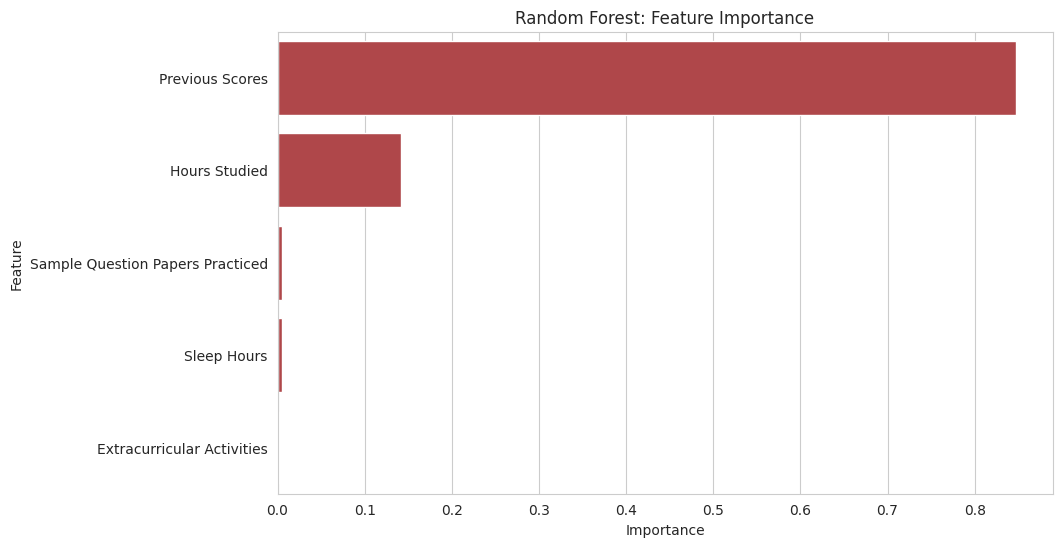

In [ ]:
# Plotting feature importances
features = X_train.columns
importances = rf_model.feature_importances_

# Create a DataFrame for better visualization
feature_importances = pd.DataFrame({"Feature": features, "Importance": importances})
feature_importances = feature_importances.sort_values(by="Importance", ascending=False)

# Plot the feature importances
plt.figure(figsize=(10,6))
sns.barplot(x="Importance", y="Feature", data=feature_importances)
plt.title("Random Forest: Feature Importance")
plt.show()


## # Comparison Between Linear Regression and Random Forest

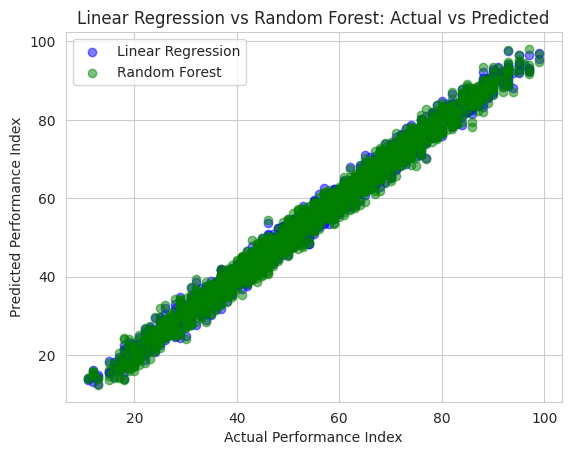

In [ ]:
plt.scatter(y_test, lr_predict, color='blue', label='Linear Regression', alpha=0.5)
plt.scatter(y_test, rf_predict, color='green', label='Random Forest', alpha=0.5)
plt.title("Linear Regression vs Random Forest: Actual vs Predicted")
plt.xlabel("Actual Performance Index")
plt.ylabel("Predicted Performance Index")
plt.legend()
plt.show()

## 5 Evaluating Results

## #  Evaluaation the linier regresion

In [ ]:
# Calculate the score of the model on the training data

model.score(X_train, y_train)

0.9886898790682355

In [ ]:
# see predicted values

predict = np.round(model.predict(X_test), decimals = 1)

In [ ]:
# Real Values vs Predicted Values

pd.DataFrame({"Actual Performance" : y_test, "Predicted Performance" : predict})

,Actual Performance,Predicted Performance
6252,51.0,54.7
4684,20.0,22.6
1731,46.0,47.9
4742,28.0,31.3
4521,41.0,43.0
...,...,...
6412,45.0,46.9
8285,66.0,62.7
7853,16.0,16.8
1095,65.0,63.3


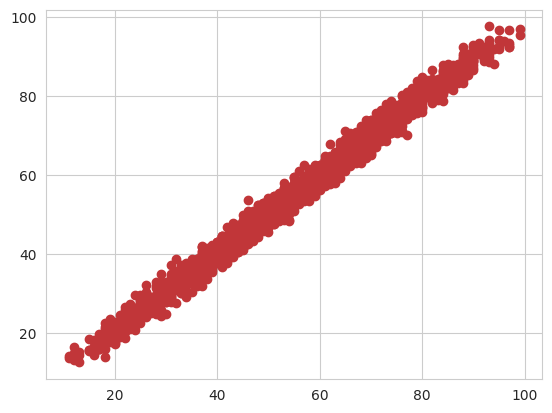

In [ ]:
# Create scatter plot to see distribution

plt.scatter(y_test, predict)
plt.show()

In [ ]:
# see mean absolute error

mean_absolute_error(y_test,predict)

1.612

In [ ]:
# see score

r2_score(y_test,predict)

0.9889704960519785

In [ ]:
# see coefficients values

model.coef_

array([2.85248393, 1.0169882 , 0.60861668, 0.47694148, 0.19183144])

In [ ]:
# see y intercept

model.intercept_

-33.92194621555638

## # Evaluate the Random Forest Model

In [ ]:
#Training R² Score:]
model.score(X_train, y_train)


0.9886898790682355

In [ ]:
#prediksi nilai testing
predict = np.round(model.predict(X_test), decimals=1)



In [ ]:
#R² Score pada Testing Data:
r2_score(y_test, predict)

0.9889704960519785

In [ ]:

# Initialize the Random Forest model
rf_model = RandomForestRegressor(random_state=42)

In [ ]:
# Fit the model
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [ ]:
# Calculate the score of the model on the training data
rf_train_score = rf_model.score(X_train, y_train)
print(f"Random Forest Training Score: {rf_train_score:.4f}")

Random Forest Training Score: 0.9975


In [ ]:

# See predicted values on the test set
rf_predict = np.round(rf_model.predict(X_test), decimals = 1)

In [ ]:
# Real Values vs Predicted Values (in DataFrame form for better visualization)
rf_comparison = pd.DataFrame({"Actual Performance": y_test, "Predicted Performance": rf_predict})
print(rf_comparison.head())


      Actual Performance  Predicted Performance
6252                51.0                   56.2
4684                20.0                   22.0
1731                46.0                   46.4
4742                28.0                   29.5
4521                41.0                   42.8


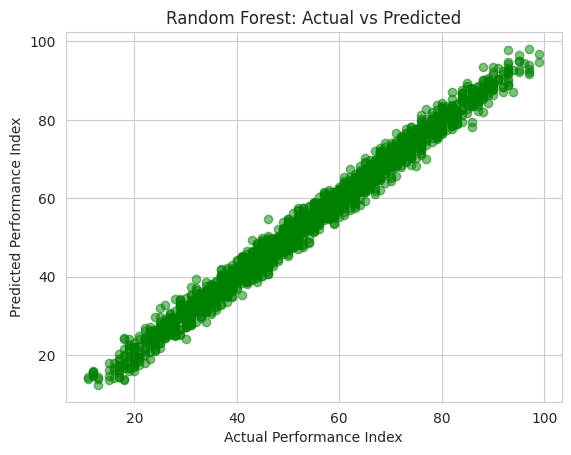

In [ ]:
# Create scatter plot to see the distribution of predicted vs actual values
plt.scatter(y_test, rf_predict, color='green', alpha=0.5)
plt.title("Random Forest: Actual vs Predicted")_
plt.xlabel("Actual Performance Index")
plt.ylabel("Predicted Performance Index")
plt.show()

In [ ]:
# Calculate the Mean Absolute Error (MAE)
rf_mae = mean_absolute_error(y_test, rf_predict)
print(f"Random Forest Mean Absolute Error: {rf_mae:.4f}")

Random Forest Mean Absolute Error: 1.8143


In [ ]:
# Calculate the R-Squared (R²) score for the model
rf_r2 = r2_score(y_test, rf_predict)
print(f"Random Forest R2 Score: {rf_r2:.4f}")

Random Forest R2 Score: 0.9861


In [ ]:
# Feature importance (to check which features are important in prediction)
importances = rf_model.feature_importances_

In [ ]:

# Create a DataFrame to display the features and their importance
features = X_train.columns
feature_importances = pd.DataFrame({"Feature": features, "Importance": importances})
feature_importances = feature_importances.sort_values(by="Importance", ascending=False)

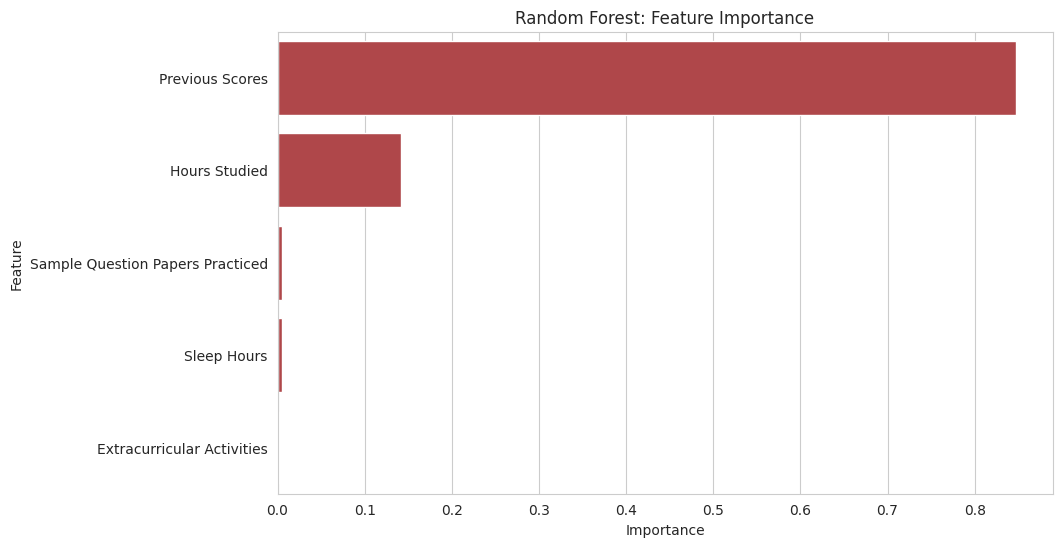

In [ ]:
# Plot the feature importance
plt.figure(figsize=(10,6))
sns.barplot(x="Importance", y="Feature", data=feature_importances)
plt.title("Random Forest: Feature Importance")
plt.show()

In [ ]:

# There is no direct "coefficient" in Random Forest, but we can check the importance of each feature
print(f"Feature Importances: \n{feature_importances}")

Feature Importances: 
                            Feature  Importance
1                   Previous Scores    0.847028
0                     Hours Studied    0.141622
4  Sample Question Papers Practiced    0.005188
3                       Sleep Hours    0.004818
2        Extracurricular Activities    0.001343
